# Lines and Bound

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [10]:
%run 'Color_and_Legends.ipynb'

In [11]:
ttc = pd.read_csv('ttc_delays_cleaned.csv')
ttc['Hour'] = pd.to_datetime(ttc['Time'], format='%H:%M').dt.hour
ttc.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Station_original,Line_ori,Code Description,Hour
0,1/1/2014,02:06,Wednesday,HIGH PARK,SUDP,3,7,West,Bloor-Danforth,5001.0,HIGH PARK STATION,BD,Disorderly Patron,2
1,1/1/2014,02:40,Wednesday,SHEPPARD,MUNCA,0,0,NaN,Yonge-University,NaN,SHEPPARD STATION,YU,NaN,2
2,1/1/2014,03:10,Wednesday,LANSDOWNE,SUDP,3,8,West,Bloor-Danforth,5116.0,LANSDOWNE STATION,BD,Disorderly Patron,3
3,1/1/2014,03:20,Wednesday,BLOOR,MUSAN,5,10,South,Yonge-University,5386.0,BLOOR STATION,YU,Unsanitary Vehicle,3
4,1/1/2014,03:29,Wednesday,DUFFERIN,MUPAA,0,0,East,Bloor-Danforth,5174.0,DUFFERIN STATION,BD,Passenger Assistance Alarm Activated - No Trou...,3


The number of delays on each line

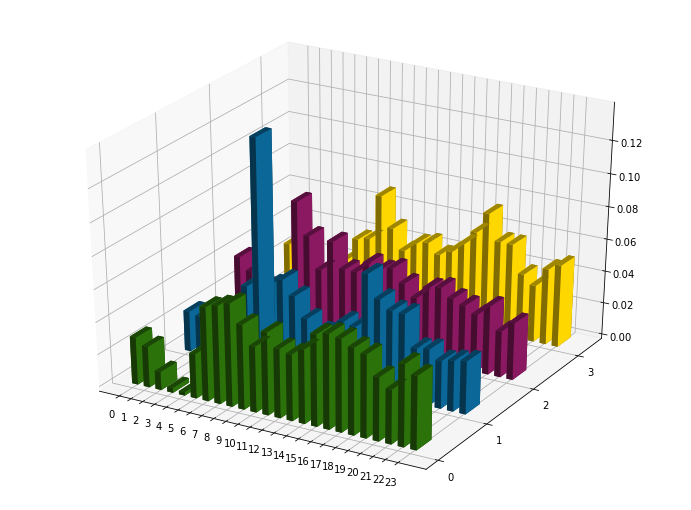

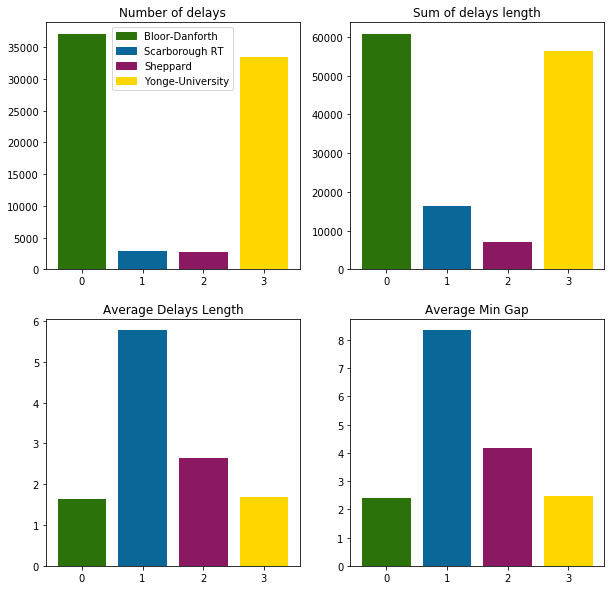

In [12]:
lines = ttc.groupby('Line')
x = np.arange(4)

fig, ax = plt.subplots(2,2, figsize=(10,10))
ax[0][0].bar(x,lines.size().values, color=colors)
ax[0][0].set_title('Number of delays')

ax[0][1].bar(x,lines['Min Delay'].sum().values, color=colors)
ax[0][1].set_title('Sum of delays length')

ax[1][0].bar(x,lines['Min Delay'].mean().values, color=colors)
ax[1][0].set_title('Average Delays Length')

ax[1][1].bar(x,lines['Min Gap'].mean().values, color=colors)
ax[1][1].set_title('Average Min Gap')
ax[0][0].legend(handles=line_patches)


plt.show()

## Bound

In [7]:
fix, ax = plt.subplots(1,3,figsize=(15,5))
line_bound = ttc.groupby(['Line', 'Bound'])

directions = line_bound.size().unstack()
directions.plot.bar(color=direction_colors, ax=ax[0], title='Number of Delays')

directions = line_bound['Min Delay'].mean().unstack()
directions.plot.bar(color=direction_colors, ax=ax[1], title='Average Delay')

directions = line_bound['Min Delay'].sum().unstack()
directions.plot.bar(color=direction_colors, ax=ax[2], title='Today Delay')

plt.show()

NameError: name 'direction_colors' is not defined

Initial Braekdown by time of day

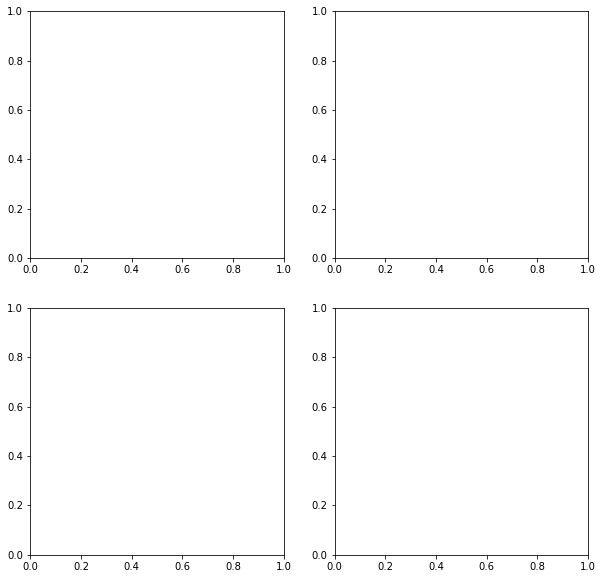

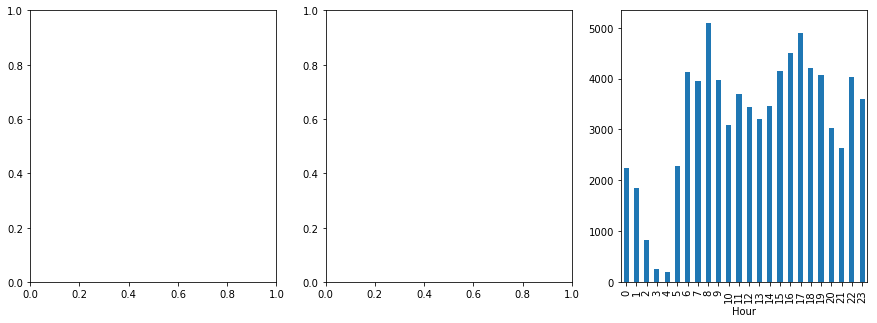

In [8]:
ttc['Hour'] = pd.to_datetime(ttc['Time'], format='%H:%M').dt.hour
ttc.groupby('Hour').size().plot.bar()
plt.show()

Lets look a the line and the time of day

In [9]:
ct = pd.crosstab(ttc.Hour, ttc.Line, normalize='columns')

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')

ct.shape #(24, 4)
x_num = ct.shape[0]
y_num = ct.shape[1]


x = np.tile(np.arange(0,x_num), y_num)
y = np.repeat(np.arange(0,y_num), x_num)
z = np.zeros(x_num*y_num)
height = np.append(ct['Bloor-Danforth'].values, [ct['Scarborough RT'].values, ct['Sheppard'].values, ct['Yonge-University'].values])
# height = np.append(ct['Bloor-Danforth'].values, [ct['Bloor-Danforth'].values, ct['Bloor-Danforth'].values, ct['Bloor-Danforth'].values])


colors = ['#2b720a'] * x_num + ['#0a6797'] * x_num + ['#8b1962'] * x_num + ['#FFD700'] *x_num
alpha = 0.80
ax.bar3d(x,y,z,0.5,0.3, height, color=colors, alpha=alpha)
ax.set_xticks(np.arange(0,x_num))
ax.set_yticks(np.arange(0,y_num))
ax.set_yticklabels(line_names)


plt.show()

NameError: name 'line_names' is not defined

Lets look at the direction based on the time of day

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(15,10), sharex=True, sharey=True)
x = np.arange(24)
yonge = ttc[ttc['Line'] == 'Yonge-University']
yonge_ns = pd.crosstab(yonge.Hour, yonge.Bound, normalize='columns')
ax[0][0].bar(x,yonge_ns['North'], color=north_color, alpha=0.65, label='North')
ax[0][0].bar(x,yonge_ns['South'], color=south_color, alpha=0.65, label='South')
ax[0][0].set_xticks(x)
ax[0][0].set_title('Yonge-University')
ax[0][0].legend()

bloor = ttc[ttc['Line'] == 'Bloor-Danforth']
bloor = pd.crosstab(bloor.Hour, bloor.Bound, normalize='columns')
ax[0][1].bar(x,bloor['East'], color=east_color, alpha=0.65, label='East')
ax[0][1].bar(x,bloor['West'], color=west_color, alpha=0.65, label='West')
ax[0][1].set_xticks(x)
ax[0][1].set_title('Bloor-Danforth')
ax[0][1].legend()

shepard = ttc[ttc['Line'] == 'Sheppard']
shepard = pd.crosstab(shepard.Hour, shepard.Bound, normalize='columns')
ax[1][0].bar(x,shepard['East'], color=east_color, alpha=0.65, label='East')
ax[1][0].bar(x,shepard['West'], color=west_color, alpha=0.65, label='West')
ax[1][0].set_xticks(x)
ax[1][0].set_title('Sheppard')
ax[1][0].set_xlabel('Hour')
ax[0][1].legend()

scarborough = ttc[ttc['Line'] == 'Scarborough RT']
scarborough = pd.crosstab(scarborough.Hour, scarborough.Bound, normalize='columns')
scarborough.loc[4] = [0,0]
ax[1][1].bar(x,scarborough['East'], color=east_color, alpha=0.65, label='East')
ax[1][1].bar(x,scarborough['West'], color=west_color, alpha=0.65, label='West')
ax[1][1].set_xticks(x)
ax[1][1].set_title('Scarborough RT')
ax[1][1].set_xlabel('Hour')
ax[0][1].legend()

plt.show()